In [11]:
# install main library YFinance
!pip install yfinance

In [12]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [13]:
'''end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')'''

# Change the end date to 2023
end = date(2023, 1, 1)  # Assuming January 1, 2023 for this example

print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')


Year = 2023; month= 1; day=1
Period for indexes: 1953-01-01 to 2023-01-01 


In [14]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [15]:

'''gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot.tail()
     '''
     # Assuming the data represents quarterly data
# Year-over-Year (YoY) Growth for 2023 (shift by 4 quarters for a year)
gdppot['gdppot_us_yoy_2023'] = gdppot['GDPPOT'] / gdppot['GDPPOT'].shift(4) - 1

# Quarter-over-Quarter (QoQ) Growth for 2023 (shift by 1 quarter)
gdppot['gdppot_us_qoq_2023'] = gdppot['GDPPOT'] / gdppot['GDPPOT'].shift(1) - 1

# Display the tail of the DataFrame
print(gdppot.tail())


              GDPPOT  gdppot_us_yoy_2023  gdppot_us_qoq_2023
DATE                                                        
2023-04-01  22246.23            0.021312            0.005442
2023-07-01  22369.71            0.021719            0.005551
2023-10-01  22495.19            0.022190            0.005609
2024-01-01  22618.15            0.022251            0.005466
2024-04-01  22739.00            0.022151            0.005343


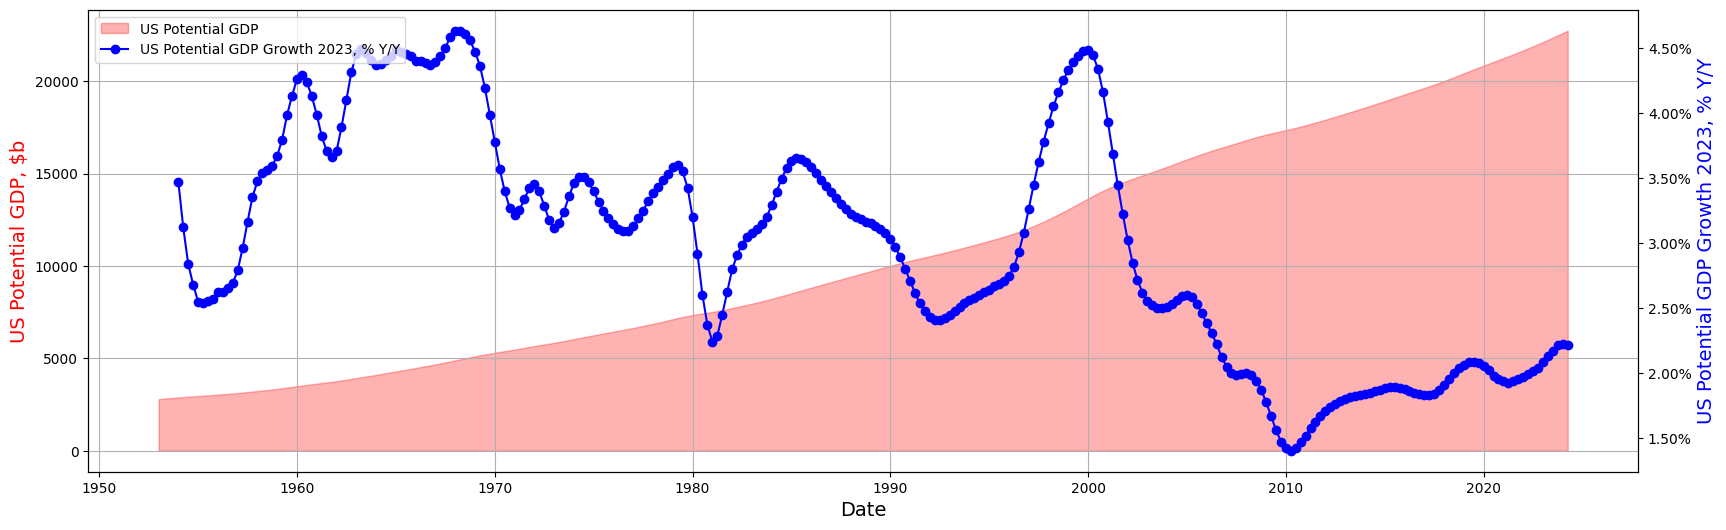

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage for 2023
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.index, gdppot.gdppot_us_yoy_2023, color="blue", marker="o", label="US Potential GDP Growth 2023, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth 2023, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [17]:
# Assuming gdppot_us_yoy_2023 contains the year-over-year growth rates for 2023

# Calculate the average growth rate for 2023
average_growth_2023 = gdppot['gdppot_us_yoy_2023'].mean()

# Convert to percentage
average_growth_2023_percent = average_growth_2023 * 100

print("Average GDP Growth in 2023: {:.2f}%".format(average_growth_2023_percent))


Average GDP Growth in 2023: 2.99%


In [19]:
import pandas as pd
import pandas_datareader as pdr

# Download DGS2 and DGS10 interest rates series
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

# Join the two DataFrames into one based on the date
df_rates = pd.concat([dgs2, dgs10], axis=1)
df_rates.columns = ['DGS2', 'DGS10']

# Calculate the difference DGS10 - DGS2
df_rates['DGS10_minus_DGS2'] = df_rates['DGS10'] - df_rates['DGS2']

# Filter data since year 2000
df_rates_since_2000 = df_rates[df_rates.index >= pd.to_datetime('2000-01-01')]

# Find the minimum value of (DGS10 - DGS2) since 2000
min_diff_since_2000 = df_rates_since_2000['DGS10_minus_DGS2'].min()

# Round to 1 decimal place
min_diff_rounded = round(min_diff_since_2000, 1)

print("Minimum value of (DGS10 - DGS2) since 2000:", min_diff_rounded)



Minimum value of (DGS10 - DGS2) since 2000: -1.1


In [20]:
import pandas as pd
import yfinance as yf

# Define the ticker symbols for S&P 500 and IPC Mexico
sp500_ticker = "^GSPC"
ipc_ticker = "^MXX"

# Download historical data for S&P 500 and IPC Mexico
start_date = "2019-04-09"
end_date = "2024-04-09"

sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
ipc_data = yf.download(ipc_ticker, start=start_date, end=end_date)

# Calculate the 5-year growth for S&P 500
sp500_start_price = sp500_data['Close'].iloc[0]
sp500_end_price = sp500_data['Close'].iloc[-1]
sp500_growth = (sp500_end_price / sp500_start_price - 1) * 100

# Calculate the 5-year growth for IPC Mexico
ipc_start_price = ipc_data['Close'].iloc[0]
ipc_end_price = ipc_data['Close'].iloc[-1]
ipc_growth = (ipc_end_price / ipc_start_price - 1) * 100

# Determine the higher growing index and its growth percentage
if sp500_growth > ipc_growth:
    higher_growing_index = "S&P 500"
    growth_percent = round(sp500_growth)
else:
    higher_growing_index = "IPC Mexico"
    growth_percent = round(ipc_growth)

print("Higher Growing Index:", higher_growing_index)
print("5-Year Growth:", growth_percent, "%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Higher Growing Index: S&P 500
5-Year Growth: 81 %


In [21]:
import pandas as pd
import yfinance as yf

# Define the list of stock tickers
stock_tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Initialize an empty dictionary to store the range ratios
range_ratios = {}

# Download and process data for each stock
for ticker in stock_tickers:
    # Download data from Yahoo Finance
    stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

    # Calculate the maximum and minimum "Adj. Close" prices
    max_adj_close = stock_data['Adj Close'].max()
    min_adj_close = stock_data['Adj Close'].min()

    # Calculate the range ratio
    range_ratio = (max_adj_close - min_adj_close) / max_adj_close

    # Store the range ratio in the dictionary
    range_ratios[ticker] = round(range_ratio, 2)  # Round to two decimal places

# Find the stock with the largest range ratio
largest_range_stock = max(range_ratios, key=range_ratios.get)
largest_range_ratio = range_ratios[largest_range_stock]

# Print the results
print("Stock with Largest Range Ratio:", largest_range_stock)
print("Largest Range Ratio:", largest_range_ratio)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Stock with Largest Range Ratio: MSFT
Largest Range Ratio: 0.42


In [22]:
import pandas as pd
import yfinance as yf

# Define the list of stock tickers
stock_tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Initialize an empty dictionary to store total dividends and closing prices
dividend_yield = {}

# Download dividends and closing prices for each stock
for ticker in stock_tickers:
    # Download dividends paid in 2023
    stock = yf.Ticker(ticker)
    dividends = stock.dividends
    dividends_2023 = dividends.loc['2023']

    # Sum up all dividends paid in 2023
    total_dividends_2023 = dividends_2023.sum()

    # Download historical data for the stock in 2023
    stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

    # Get the closing price (Adj. Close) at the last trading day of the year
    last_trading_day = stock_data.index[-1]
    closing_price = stock_data.loc[last_trading_day, 'Adj Close']

    # Calculate the dividend yield
    dividend_yield[ticker] = (total_dividends_2023 / closing_price) * 100

# Find the stock with the largest dividend yield
largest_yield_stock = max(dividend_yield, key=dividend_yield.get)
largest_yield_value = dividend_yield[largest_yield_stock]

# Print the results
print("Stock with Largest Dividend Yield:", largest_yield_stock)
print("Largest Dividend Yield:", round(largest_yield_value, 1), "%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Stock with Largest Dividend Yield: 2222.SR
Largest Dividend Yield: 2.8 %
